In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import sys

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100

sys.path.append("../scripts")
from plot import get_price_duration

FC_EFFICIENCY = 0.5

In [2]:
voll_files = {
    int(v * FC_EFFICIENCY): f"../../results/20240625-reserve/network_solved_LT-country+DE-voll+true-reserve+{v}.nc"
    for v in [0, 20, 60, 100, 140, 180]
}
ns_voll = {k: pypsa.Network(v) for k, v in voll_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-reserve+0.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-reserve+20.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-reserve+60.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-reserve+100.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-reserve+140.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-reserve+180.nc has buses, carriers, generators, links, loads, stores


In [3]:
elas_files = {
    int(v * FC_EFFICIENCY): f"../../results/20240625-reserve/network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+{v}.nc"
    for v in [0, 20, 60, 100, 140, 180]
}
ns_elas = {k: pypsa.Network(v) for k, v in elas_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+0.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+20.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+60.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+100.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+140.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+180.nc has buses, carriers, generators, links, loads, stores


In [4]:
pdc_voll = {k: get_price_duration(v) for k, v in ns_voll.items()}
pdc_elas = {k: get_price_duration(v) for k, v in ns_elas.items()}

In [5]:
voll_st_files = {
    int(v * FC_EFFICIENCY): f"../../results/20240625-reserve/network_myopic_LT-country+DE-voll+true-reserve+{v}_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc"
    for v in [0, 20, 60, 100, 140, 180]
}
ns_voll_st = {k: pypsa.Network(v) for k, v in voll_st_files.items()}



INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-reserve+0_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-reserve+20_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-reserve+60_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-reserve+100_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-reserve+140_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, lo

In [6]:
elas_st_files = {
    int(v * FC_EFFICIENCY): f"../../results/20240625-reserve/network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+{v}_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc"
    for v in [0, 20, 60, 100, 140, 180]
}
ns_elas_st = {k: pypsa.Network(v) for k, v in elas_st_files.items()}

INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+0_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+20_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+60_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-reserve+100_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-ela

In [7]:
pdc_voll_st = {k: get_price_duration(v) for k, v in ns_voll_st.items()}
pdc_elas_st = {k: get_price_duration(v) for k, v in ns_elas_st.items()}

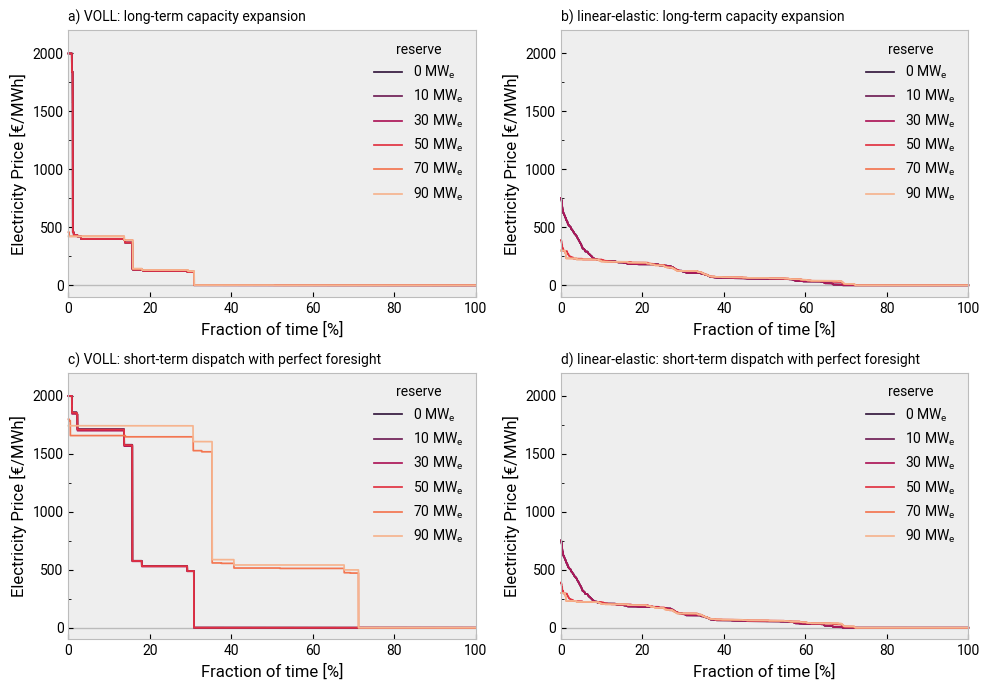

In [8]:
pu_colors = sns.color_palette("rocket", 6)
cat_colors = sns.color_palette("colorblind")
lw = 1.25

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

for i, (k, pdc) in enumerate(pdc_voll.items()):
    pdc.plot(ax=axs[0, 0], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

for i, (k, pdc) in enumerate(pdc_elas.items()):
    pdc.plot(ax=axs[0, 1], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

for i, (k, pdc) in enumerate(pdc_voll_st.items()):
    pdc.plot(ax=axs[1, 0], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

for i, (k, pdc) in enumerate(pdc_elas_st.items()):
    pdc.plot(ax=axs[1, 1], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

axs[0, 0].set_title(
    "a) VOLL: long-term capacity expansion", loc="left", fontsize="medium"
)
axs[0, 1].set_title(
    "b) linear-elastic: long-term capacity expansion", loc="left", fontsize="medium"
)

axs[1, 0].set_title(
    "c) VOLL: short-term dispatch with perfect foresight", loc="left", fontsize="medium"
)
axs[1, 1].set_title(
    "d) linear-elastic: short-term dispatch with perfect foresight", loc="left", fontsize="medium"
)


for i in range(2):
    axs[0, i].set_ylim(-100, 2200)
    axs[0, i].set_ylabel("Electricity Price [€/MWh]")
    axs[0, i].set_yticks(range(0, 2001, 250), minor=True)

for i in range(2):
    axs[1, i].set_ylim(-100, 2200)
    axs[1, i].set_ylabel("Electricity Price [€/MWh]")
    axs[1, i].set_yticks(range(0, 2001, 250), minor=True)

for i in range(2):
    for j in range(2):
        axs[i, j].set_xlabel("Fraction of time [%]")
        axs[i, j].axhline(0, linewidth=1, color="#bbb", zorder=0)
        axs[i, j].set_xlim(0, 100)
        axs[i, j].legend(title='reserve')

for ext in ["png", "pdf"]:
    plt.savefig(f"../../figures/figure-reserve.{ext}", bbox_inches="tight", dpi=300)